In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
lang = 'telugu'

In [111]:
telugu_df = pd.read_csv(f'data/1000_Ramayana_Prashnottari - {lang}.tsv', sep='\t')
telugu_df

,id,question,answer,telugu,correct,answer.1
0,1,श्रीराम की सेना के दो अभियंता वानरों के नाम बत...,नल-नील,శ్రీరాముని సైన్యంలోని రెండు ఇంజనీర్ వానరుల పేర...,శ్రీరాముని సైన్యములోని ఇద్దరు నిర్మాణవేత్తలయిన...,నలనీలులు
1,2,जिस विमान पर बैठकर श्रीराम लक्ष्मण-सीता सहित ल...,पुष्पक,ఎట్టివిమానం ఎక్కి శ్రీరాముడు లక్ష్మణుడు సీతతో ...,శ్రీరాముడు సీతతోను లక్ష్మణునితోను కలిసి లంకనుం...,పుష్పక విమానం
2,3,"लंका के उस प्रसिद्ध वैद्य का क्या नाम था, जिसे...",सुषेण,"లంకలోని ప్రసిద్ధ వైద్యుని పేరు ఏమిటి, లక్రమణుడ...",లక్ష్మణుని మూర్ఛనుండి కోలుకునేట్టు చేసిన లంకలో...,సుషేణుడు
3,4,लक्ष्मण की मूर्च्छा दूर करने हेतु हनुमानजी जो ...,संजीवनी बूटी,లక్ష్మణుడి మూర్చనను పోగొట్టడానికి హనుమంతుడు తీ...,లక్ష్మణుడు మూర్ఛనుండి కోలుకోవుటకు హనుమంతుడు గై...,సంజీవని
4,5,राजा जनक का मूल नाम क्या था ?,सीरध्वज,రాజా జనకుని అసలు పేరు ఏమిటి?,జనక మహారాజుయొక్క వాస్తవిక నామము ఏమిటి?,సీరధ్వజుడు
...,...,...,...,...,...,...
995,996,महिरावण (अद्भुत रामायण के अनुसार) रावण का कौन ...,पुत्र,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణుడికి ఎవరు?,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణునికి ఎవరు?,కొడుకు
996,997,श्रीराम के अश्वमेध यज्ञ में सीताजों के स्थान प...,स्वर्ण,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానం చేయగా ఆ...,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానంలో ఆమె ర...,బంగారం
997,998,गंधर्वराज शैलूष विभीषण का क्या लगता था ?,श्वसुर,గంధర్వరాజు శైలూష చీల వంశం లో ఎవరు?,గంధర్వరాజు శైలూషుడు విభీషుణికి ఏమవుతాడు?,మావగారు
998,999,भरत-शत्रुघ्न के श्वसुर कौन थे ?,कुशध्वज,భరతశతృఘ్నుల మామయ్యలు ఎవరు?,భరతశతృఘ్నుల మావగారు ఎవరు?,కుశధ్వజుడు


In [112]:
columns_todrop = ['question', 'answer', 'answer.1', 'id']
for col in telugu_df.columns:
    if 'Unnamed' in col:
        columns_todrop.append(col)
telugu_df.drop(columns=columns_todrop, inplace=True)
telugu_df.dropna(inplace=True)

In [113]:
telugu_df['len'] = telugu_df.apply(lambda x: len(x[lang]), axis=1)

In [114]:
telugu_df

,telugu,correct,len
0,శ్రీరాముని సైన్యంలోని రెండు ఇంజనీర్ వానరుల పేర...,శ్రీరాముని సైన్యములోని ఇద్దరు నిర్మాణవేత్తలయిన...,59
1,ఎట్టివిమానం ఎక్కి శ్రీరాముడు లక్ష్మణుడు సీతతో ...,శ్రీరాముడు సీతతోను లక్ష్మణునితోను కలిసి లంకనుం...,96
2,"లంకలోని ప్రసిద్ధ వైద్యుని పేరు ఏమిటి, లక్రమణుడ...",లక్ష్మణుని మూర్ఛనుండి కోలుకునేట్టు చేసిన లంకలో...,124
3,లక్ష్మణుడి మూర్చనను పోగొట్టడానికి హనుమంతుడు తీ...,లక్ష్మణుడు మూర్ఛనుండి కోలుకోవుటకు హనుమంతుడు గై...,73
4,రాజా జనకుని అసలు పేరు ఏమిటి?,జనక మహారాజుయొక్క వాస్తవిక నామము ఏమిటి?,28
...,...,...,...
995,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణుడికి ఎవరు?,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణునికి ఎవరు?,48
996,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానం చేయగా ఆ...,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానంలో ఆమె ర...,95
997,గంధర్వరాజు శైలూష చీల వంశం లో ఎవరు?,గంధర్వరాజు శైలూషుడు విభీషుణికి ఏమవుతాడు?,34
998,భరతశతృఘ్నుల మామయ్యలు ఎవరు?,భరతశతృఘ్నుల మావగారు ఎవరు?,26


In [115]:
from sacrebleu.metrics import BLEU

In [116]:
bleu = BLEU()

In [117]:
bleu.sentence_score(telugu_df.correct[999], [telugu_df[lang][999]]).score

It is recommended to enable `effective_order` for sentence-level BLEU.


85.5526185871245

In [118]:
telugu_df['bleu'] = telugu_df.apply(lambda x: bleu.sentence_score(x[lang], [x['correct']]).score, axis=1)

It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is 

In [119]:
telugu_df.drop(columns=[lang,'correct'], inplace=True)

In [120]:
telugu_df['len'].min(), telugu_df['len'].max()

(15, 231)

In [121]:
# number of bins
N = 5

/tmp/ipykernel_1188778/3426080805.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = telugu_df.groupby('length_bin')['bleu'].agg(['mean', 'std']).reset_index()


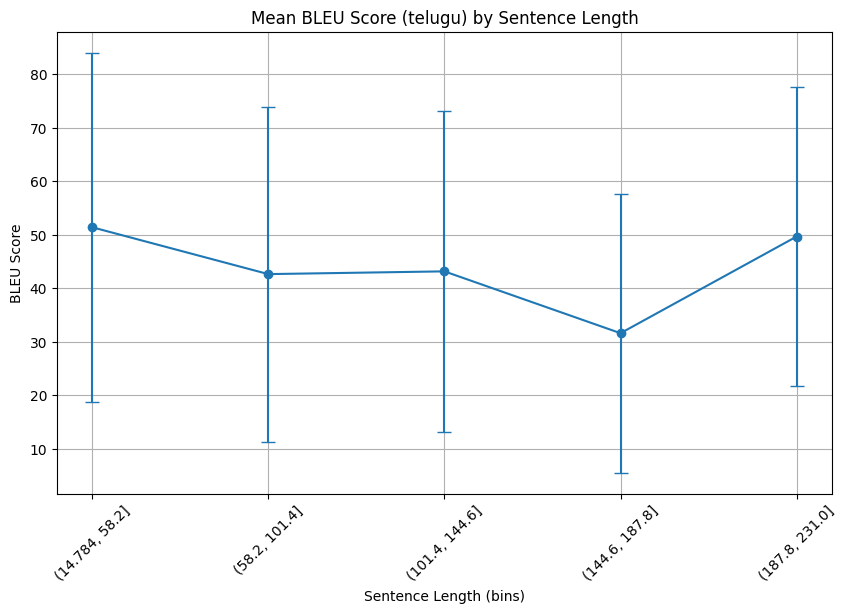

In [122]:
telugu_df['length_bin'] = pd.cut(telugu_df['len'], bins=N)

# Aggregate BLEU scores by bins
agg_df = telugu_df.groupby('length_bin')['bleu'].agg(['mean', 'std']).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(agg_df['length_bin'].astype(str), agg_df['mean'], yerr=agg_df['std'], fmt='o-', capsize=5)
plt.xlabel('Sentence Length (bins)')
plt.ylabel('BLEU Score')
plt.title(f'Mean BLEU Score ({lang}) by Sentence Length')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig(f'results/{lang}.png', bbox_inches='tight')
plt.show()

# Process raw annotated files

In [174]:
src_f = 'data/1000_Ramayana_Prashnottari - sanskrit.tsv'
dst_f = 'data/qa_set/sanskrit.tsv'

In [175]:
df= pd.read_csv(src_f, sep='\t')
df

,id,question,answer,sanskrit,correct,answer.1,MCQ,LLM_Answers,LLM_Answers_append
0,1,श्रीराम की सेना के दो अभियंता वानरों के नाम बत...,नल-नील,श्रीरामस्य सेनायाः द्वौ अभियन्तर-वानरौ नामान्य...,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामन...,नलनीलौ; नीलनलौ,NaN,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामन...,हनुमानः सुग्रीवः; श्रीरामस्य सेनायाः द्वयोः अभ...
1,2,जिस विमान पर बैठकर श्रीराम लक्ष्मण-सीता सहित ल...,पुष्पक,येन विमानेन श्रीरामः लक्ष्मणसीतेन सहित लङ्कातः...,येन विमानेन श्रीरामः सीतालक्ष्मणाभ्यां सहितः ल...,पुष्पकम्; पुष्पकविमानम्,NaN,श्रीरामस्य विमानं पुष्पकं आसीत्; अस्माभिः प्रद...,Pushpak विमानम्; वानरविमाने; येन विमानेन श्रीर...
2,3,"लंका के उस प्रसिद्ध वैद्य का क्या नाम था, जिसे...",सुषेण,लङ्कायाः प्रसिद्धः तं वैद्यं लक्ष्मणस्य मूर्च्...,हनुमान् लक्ष्मणस्य मूर्च्छानिवारणाय लङ्कायाः य...,सुषेणः,NaN,सर्वरोगहरः This is just one example of h...,हनुमान् लक्ष्मणस्य मूर्च्छानिवारणाय लङ्कायाः य...
3,4,लक्ष्मण की मूर्च्छा दूर करने हेतु हनुमानजी जो ...,संजीवनी बूटी,लक्ष्मणस्य मूर्च्छा दूराय हनुमान् याम् औषधिं आ...,लक्ष्मणस्य मूर्च्छायाः दूरीकरणाय हनुमान् याम् ...,सञ्जीवनी,NaN,विशल्याकरणीम्; हनुमान् लक्ष्मणस्य मूर्च्छायां ...,सीतातृतीयानारूढान्दृष्ट्वा धृष्टमचोदयत् सुमन्त...
4,5,राजा जनक का मूल नाम क्या था ?,सीरध्वज,राज्ञः जनकस्य किम् मूलं नाम आसीत्?,राज्ञः जनकस्य किं मूलं नाम आसीत् ?,सीरध्वजः,NaN,जनकः राजा आसीत्; सीरध्वजः; निमिः; जनकस्य मूलं ...,मिथिलः; राज्ञः जनकस्य किं मूलं नाम आसीत् ; विदेहः
...,...,...,...,...,...,...,...,...,...
995,996,महिरावण (अद्भुत रामायण के अनुसार) रावण का कौन ...,पुत्र,महिरावण (अद्भुत रामायणानुसार) रावणस्य कः भवति?,महिरावणः (अद्भुतरामायणानुसारम्) रावणस्य कः भवति?,पुत्रः,NaN,महिरावणः अद्भुतरामायणानुसारम् रावणस्य भ्राता भ...,भ्रातृगर्भः; राक्षसः; महिरावणः अद्भुतरामायणानु...
996,997,श्रीराम के अश्वमेध यज्ञ में सीताजों के स्थान प...,स्वर्ण,श्रीरामस्य अश्वमेध यज्ञे सीतायाः स्थाने यस्या ...,श्रीरामस्य अश्वमेधयज्ञे सीतायाः स्थाने या प्रत...,स्वर्णेन,NaN,; सुवर्णेन; काञ्चनम्; श्रीरामस्य अश्वमेधयज्ञे ...,श्रीरामस्य अश्वमेधयज्ञे सीतायाः स्थाने या प्रत...
997,998,गंधर्वराज शैलूष विभीषण का क्या लगता था ?,श्वसुर,गन्धर्वराजः शैलूषः विभीषणस्य कः आसीत्?,गन्धर्वराजः शैलूषः विभीषणस्य कः आसीत्?,श्वशुरः,NaN,पिता; गन्धर्वराजः शैलूषः विभीषणस्य ससुतः आसीत्...,मातुलः; गन्धर्वराजः शैलूषः विभीषणस्य कः आसीत्;...
998,999,भरत-शत्रुघ्न के श्वसुर कौन थे ?,कुशध्वज,भरतशत्रुघ्नयोः श्वशुरः कः आसीत्?,भरतशत्रुघ्नयोः श्वशुरः कः आसीत्?,कुशध्वजः,NaN,कुशध्वजः; कैकेय्याः पिता अशोकदत्तः वा युधाजित्...,सुकृतेन; प्रसेनजित्; भरतशत्रुघ्नयोः श्वशुरः कः...


In [176]:
df=df[['id','correct','answer.1','MCQ']].rename(columns={'id':'ID','correct':'QUESTION', 'answer.1':'ANSWER','MCQ':'CHOICES'}).fillna('')

In [177]:
df.to_csv(dst_f, sep='\t', index=False)

### Ayurveda

In [185]:
src_f = 'data/Ayurveda Amartam - Dataset.tsv'
dst_f = 'data/qa_set/ayurveda.tsv'
df= pd.read_csv(src_f, sep='\t')
df

,id,category,chapter_id,verse_id,question,options,answer.1,answer,LLM_Answers,LLM_Answers_append,Unnamed: 10,type,concept,final_category
0,1001,synonym,8.0,2,तृणधान्यम् कस्य पर्यायः अस्ति,क्षुद्रधान्यम् / धान्यम् / शाकम् / व्रीहिधान्यम्,क्षुद्रधान्यम्,क्षुद्रधान्यम्; क्षुद्रधान्यस्य,answer क्षुद्रधान्यम् answer क्षुद्रधान्यम्; q...,NaN,NaN,standard,synonym,synonym
1,1002,synonym,8.0,20,कृष्णतण्डुलः कस्य पर्यायः अस्ति ?,कृष्णः / जतुमुखः / व्रीहि / शालामुखः,शालामुखः,शालामुखः,question कृष्णतण्डुलः कस्य पर्यायः अस्ति cho...,कृष्णतण्डुलः शालामुखः,NaN,standard,synonym,synonym
2,1003,synonym,8.0,48,वनमुद्गः कस्य पर्यायः ?,मुद्गः / माषः / क्षुद्रधान्यम् / मकुष्ठकः,मकुष्ठकः,मकुष्ठकः,answer माषः answer माषः; question वनमुद्गः कस्...,मकुष्ठकः,NaN,standard,synonym,synonym
3,1004,"list,type",8.0,"4 , 5",शालिधान्यस्य प्रकाराः के सन्ति,NaN,रक्तशालिः + कलमः + पाण्डुकः + शकुनाहृतः + सुगन...,रक्तशालिः + कलमः + पाण्डुकः + शकुनाहृतः + सुगन...,question शालिधान्यस्य प्रकाराः के सन्ति answer...,शालिधान्यं व्रीहिधान्यं शूकधान्यं तृतीयकम् शिम...,NaN,list,list,list
4,1005,"count,type",8.0,1,धान्यस्य कति प्रकाराः उक्ताः,NaN,पञ्च,पञ्च,question धान्यस्य कति प्रकाराः उक्ताः answer ध...,पञ्चकम्; दश प्रकाराः; पञ्च; धान्यस्य पञ्चकम्; ...,NaN,count,count,count
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,433,uncategorized,NaN,31,कवलं धारयितुं कल्कस्य का मात्रा गृह्णीयात्?,अर्ध कर्ष / 1 कर्ष / 2 कर्ष / 1 कोल,1 कर्ष,1 कर्ष,1 कर्ष; अर्ध कर्ष; अर्धकर्ष; अर्धकर्षः; अर्धकर...,अर्ध कर्ष; 2 कर्ष; 1 कर्ष,NaN,standard,uncategorized,quantity
497,439,uncategorized,NaN,175,वर्त्मगतरोगेषु कियत् वाक्-शतपर्यन्तं तर्पणं का...,100 / 500 / 600 / 700,100,100; १००; शतम्,100; 500; 600; 700; उत्तरम् 700; उत्तरम् 500;...,५००; पञ्चशतं; षट्शतपर्यन्तं तर्पणं कार्यम्; 60...,NaN,standard,uncategorized,quantity
498,441,variant,NaN,199,रसरूपं चूर्णरूपं वर्त्तिरूपं च एते कस्य भेदाः?,पुटपाक / तर्पण / अञ्जन / सेक,अञ्जन,अञ्जन; अञ्जनस्य,अञ्जन; अञ्जन अञ्जनस्य त्रयः प्रमुखाः भेदाः सन...,पुटपाकस्य रसरूपं तर्पणस्य चूर्णरूपं अञ्जनस्य व...,NaN,standard,variant,variant
499,443,uncategorized,NaN,1,भावप्रकाशे उक्ता रोगिणः परीक्षा केन आचार्येण उ...,चरकः / सुश्रुतः / वाग्भट्टः / माधवः,वाग्भट्टः,वाग्भट्टः,question भावप्रकाशे उक्ता रोगिणः परीक्षा केन आ...,वाग्भट्टः,NaN,standard,uncategorized,meta


In [186]:
df=df[['id','question','answer','options']].rename(columns={'id':'ID','question':'QUESTION', 'answer':'ANSWER','options':'CHOICES'}).fillna('')

In [187]:
df.to_csv(dst_f, sep='\t', index=False)

### Cleaning Ayurveda text

In [359]:
src_txt = open("data/ref/bhavaprakasha_nighantu.txt",'r').read()

In [360]:
from indic_transliteration.sanscript import transliterate, DEVANAGARI, IAST
import re

In [361]:
elem_blocks = src_txt.split('\n\n')
len(elem_blocks)

2117

In [371]:
curr_chap = 0
curr_shloka = 0
new_blocks = []
chapter_map = {}
for block in elem_blocks:
    if re.match(r'^\w', block): ## heading
        curr_chap += 1
        chapter_map[curr_chap] = block.strip()
        curr_shloka = 0
    elif re.match(r"^\W+इति\W+श्री", block): ## ending
        chap_num = re.findall(r"([०-९]+)", block)[0]
        try:
            assert(chap_num == transliterate(str(curr_chap), IAST, DEVANAGARI))
        except:
            print(chap_num, transliterate(str(curr_chap), IAST, DEVANAGARI))
    else: ## body
        curr_shloka += 1
        shloka_num = re.findall(r"([०-९]*\.?[०-९]+)", block)[0]
        if '.' in shloka_num:
            chap_num, shloka_num = shloka_num.split('.')
            try:
                assert(chap_num == transliterate(str(curr_chap), IAST, DEVANAGARI))
            except:
                print(chap_num, transliterate(str(curr_chap), IAST, DEVANAGARI))
        new_blocks.append(re.sub(r"([०-९]*\.?[०-९]+)", f"{transliterate(str(curr_chap), IAST, DEVANAGARI)}.{transliterate(str(curr_shloka), IAST, DEVANAGARI)}", block))
        
cleaned_txt = "\n\n".join(new_blocks)

In [372]:
with open("data/ref/ayurveda_dev.txt",'w') as fp:
    fp.write(cleaned_txt)

In [375]:
import json

with open("data/ref/ayurveda_chapter_map.json", 'w') as fp:
    json.dump(chapter_map, fp)

### Generate relevance data for k=4

In [517]:
src_df = pd.read_csv('results/rag/ayurveda_bm25_4.tsv',sep='\t')
#aux_df = pd.read_csv('data/bm25_3_rel.tsv',sep='\t')

In [518]:
#aux_df = aux_df[['ID','context_0','rel_0','context_1','rel_1','context_2','rel_2']]
src_df = src_df[['ID','context_0','context_1','context_2','context_3']]

In [42]:
aux_df['context_3'] = src_df['context_3'].copy()

/tmp/ipykernel_2575855/4041207194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_df['context_3'] = src_df['context_3'].copy()


In [523]:
src_df.to_csv('data/ayurveda_bm25_4_rel.tsv',index=False,sep='\t')

### Combine the answers generated by the LLMs

In [674]:
lang = 'ayurveda'
pr = 'ayurveda_'

In [675]:
qa_df = pd.read_csv(f'data/qa_set/{lang}.tsv', sep='\t')

In [676]:
answer_files = [f"results/zero_shot/{lang}_{i}.tsv" for i in range(3)] +\
               [f"results/rag/{pr}{emb}_{k+1}.tsv" for k in range(4) for emb in ['bm25','fasttext','glove']]+\
                [f"results/kgqa/{lang}.tsv"]

In [163]:
from tqdm import tqdm
tqdm.pandas()
import string
table = str.maketrans(dict.fromkeys(string.punctuation))  # OR {key: None for key in string.punctuation}

In [678]:
from SktQA.utils import LOW_END_MODELS, DEFAULT_MODELS

In [679]:
qa_df['LLM_Answers'] = qa_df.apply(lambda x: set(), axis=1)
for answer_file in tqdm(answer_files):
    answer_df = pd.read_csv(answer_file, sep='\t').fillna('')
    methods = [col for col in answer_df.columns if col not in ['ID','QUESTION','ANSWER','CHOICES'] + LOW_END_MODELS and 'context' not in col and 'maxd' not in col and 'paths' not in col]
    qa_df['LLM_Answers_new'] = answer_df.apply(lambda x: [x[m].translate(table) for m in methods], axis=1)
    qa_df['LLM_Answers'] = qa_df.apply(lambda x: x['LLM_Answers'].union(x['LLM_Answers_new']), axis=1)
qa_df.drop(columns=['LLM_Answers_new'], inplace=True)
qa_df.apply(lambda x: x['LLM_Answers'].remove('') if '' in x['LLM_Answers'] else None, axis=1)
qa_df

100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 25.95it/s]


,ID,QUESTION,ANSWER,CHOICES,LLM_Answers
0,1001,तृणधान्यम् कस्य पर्यायः अस्ति,क्षुद्रधान्यम्,क्षुद्रधान्यम् / धान्यम् / शाकम् / व्रीहिधान्यम्,"{क्षुद्रधान्यस्य, धान्यम्, answer क्षुद्रधान्य..."
1,1002,कृष्णतण्डुलः कस्य पर्यायः अस्ति ?,शालामुखः,कृष्णः / जतुमुखः / व्रीहि / शालामुखः,"{कृष्णतण्डुलः शालामुखः पर्यायः अस्ति, कृष्णतण्..."
2,1003,वनमुद्गः कस्य पर्यायः ?,मकुष्ठकः,मुद्गः / माषः / क्षुद्रधान्यम् / मकुष्ठकः,"{माषः, answer माषः answer माषः, माषः \n\nवनमुद..."
3,1004,शालिधान्यस्य प्रकाराः के सन्ति,रक्तशालिः + कलमः + पाण्डुकः + शकुनाहृतः + सुगन...,NaN,"{शालि, षट्पदाः षट्, विविधाः, बहवः, रक्तशाल्या..."
4,1005,धान्यस्य कति प्रकाराः उक्ताः,पञ्च,NaN,"{षट् षड्धा धान्यविभागः उक्तः, षट्, त्रयः, षट..."
...,...,...,...,...,...
496,433,कवलं धारयितुं कल्कस्य का मात्रा गृह्णीयात्?,1 कर्ष,अर्ध कर्ष / 1 कर्ष / 2 कर्ष / 1 कोल,"{कोलः, अर्धकर्ष, एकं कर्षम् कवलधारणस्य प्रभाव..."
497,439,वर्त्मगतरोगेषु कियत् वाक्-शतपर्यन्तं तर्पणं का...,100,100 / 500 / 600 / 700,{वर्त्मगतरोगेषु पञ्चशतवाक्पर्यन्तं तर्पणं कार्...
498,441,रसरूपं चूर्णरूपं वर्त्तिरूपं च एते कस्य भेदाः?,अञ्जन,पुटपाक / तर्पण / अञ्जन / सेक,{उत्तरम् अञ्जनस्य\n\nयतः अञ्जनस्य त्रयः प्रमुख...
499,443,भावप्रकाशे उक्ता रोगिणः परीक्षा केन आचार्येण उ...,वाग्भट्टः,चरकः / सुश्रुतः / वाग्भट्टः / माधवः,{भावप्रकाशे उक्ता रोगिणः परीक्षा वाग्भट्टेन उक...


In [680]:
qa_df['LLM_Answers'] = qa_df.apply(lambda x: list(x['LLM_Answers']), axis=1)
qa_df.apply(lambda x: x['LLM_Answers'].sort(), axis=1)
qa_df['LLM_Answers'] = qa_df.apply(lambda x: '; '.join(x['LLM_Answers']), axis=1)

In [681]:
qa_df.to_csv(f'data/{lang}_generated_answers.tsv',index=False,sep='\t')

## Append the answers

In [179]:
import pandas as pd
qa_df = pd.read_csv(f'data/ayurveda_generated_answers.tsv',sep='\t')
#qa_df = pd.read_csv(f'data/1000_Ramayana_Prashnottari - sanskrit.tsv', sep='\t')
#qa_df.fillna('',inplace=True)
#qa_df['LLM_Answers'] = qa_df.apply(lambda x: '; '.join(set([y.strip() for y in x['LLM_Answers'].split(';')+x['LLM_Answers_append'].split(';')])),axis=1)

In [180]:
qa_df = qa_df[['id','correct','answer.1','MCQ','LLM_Answers']].rename(columns={'id': 'ID', 'correct': 'QUESTION', 'answer.1':'ANSWER', 'MCQ': 'OPTIONS'})

KeyError: "['id', 'correct', 'answer.1', 'MCQ'] not in index"

In [181]:
answer_files = ["results/rag/en_ayurveda_bm25_4.tsv","results/zero_shot/ayurveda_en_0.tsv"]

In [182]:
qa_df['LLM_Answers_append'] = qa_df.apply(lambda x: set(), axis=1)
for answer_file in tqdm(answer_files):
    answer_df = pd.read_csv(answer_file, sep='\t').fillna('')
    methods = [col for col in answer_df.columns if col not in ['ID','QUESTION','ANSWER','CHOICES'] and 'context' not in col and 'maxd' not in col and 'paths' not in col]
    qa_df['LLM_Answers_new'] = answer_df.apply(lambda x: [x[m].translate(table) for m in methods], axis=1)
    qa_df['LLM_Answers_append'] = qa_df.apply(lambda x: x['LLM_Answers_append'].union(x['LLM_Answers_new']), axis=1)
qa_df.drop(columns=['LLM_Answers_new'], inplace=True)
qa_df.apply(lambda x: x['LLM_Answers_append'].remove('') if '' in x['LLM_Answers_append'] else None, axis=1)
qa_df['LLM_Answers_append'] = qa_df.apply(lambda x: x['LLM_Answers_append'].difference(set(x['LLM_Answers'].split())), axis=1)
qa_df

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.31it/s]


,ID,QUESTION,ANSWER,CHOICES,LLM_Answers,LLM_Answers_append
0,1001,तृणधान्यम् कस्य पर्यायः अस्ति,क्षुद्रधान्यम्,क्षुद्रधान्यम् / धान्यम् / शाकम् / व्रीहिधान्यम्,answer क्षुद्रधान्यम् answer क्षुद्रधान्यम्; q...,{}
1,1002,कृष्णतण्डुलः कस्य पर्यायः अस्ति ?,शालामुखः,कृष्णः / जतुमुखः / व्रीहि / शालामुखः,question कृष्णतण्डुलः कस्य पर्यायः अस्ति cho...,{कृष्णतण्डुलः शालामुखः}
2,1003,वनमुद्गः कस्य पर्यायः ?,मकुष्ठकः,मुद्गः / माषः / क्षुद्रधान्यम् / मकुष्ठकः,answer माषः answer माषः; question वनमुद्गः कस्...,{मकुष्ठकः}
3,1004,शालिधान्यस्य प्रकाराः के सन्ति,रक्तशालिः + कलमः + पाण्डुकः + शकुनाहृतः + सुगन...,NaN,question शालिधान्यस्य प्रकाराः के सन्ति answer...,{शालिधान्यं व्रीहिधान्यं शूकधान्यं तृतीयकम् शि...
4,1005,धान्यस्य कति प्रकाराः उक्ताः,पञ्च,NaN,question धान्यस्य कति प्रकाराः उक्ताः answer ध...,"{पञ्चकम्, दश प्रकाराः, पञ्च, धान्यस्य पञ्चकम्,..."
...,...,...,...,...,...,...
496,433,कवलं धारयितुं कल्कस्य का मात्रा गृह्णीयात्?,1 कर्ष,अर्ध कर्ष / 1 कर्ष / 2 कर्ष / 1 कोल,1 कर्ष; अर्ध कर्ष; अर्धकर्ष; अर्धकर्षः; अर्धकर...,"{अर्ध कर्ष, 2 कर्ष, 1 कर्ष}"
497,439,वर्त्मगतरोगेषु कियत् वाक्-शतपर्यन्तं तर्पणं का...,100,100 / 500 / 600 / 700,100; 500; 600; 700; उत्तरम् 700; उत्तरम् 500;...,"{५००, पञ्चशतं, षट्शतपर्यन्तं तर्पणं कार्यम्, 6..."
498,441,रसरूपं चूर्णरूपं वर्त्तिरूपं च एते कस्य भेदाः?,अञ्जन,पुटपाक / तर्पण / अञ्जन / सेक,अञ्जन; अञ्जन\n\nअञ्जनस्य त्रयः प्रमुखाः भेदाः ...,{पुटपाकस्य रसरूपं तर्पणस्य चूर्णरूपं अञ्जनस्य ...
499,443,भावप्रकाशे उक्ता रोगिणः परीक्षा केन आचार्येण उ...,वाग्भट्टः,चरकः / सुश्रुतः / वाग्भट्टः / माधवः,question भावप्रकाशे उक्ता रोगिणः परीक्षा केन आ...,{वाग्भट्टः}


In [183]:
qa_df['LLM_Answers_append'] = qa_df.apply(lambda x: '; '.join(list(x['LLM_Answers_append'])), axis=1)

In [184]:
lang = 'ayurveda'
qa_df.to_csv(f'data/{lang}_generated_answers.tsv',index=False,sep='\t')

### Ayurveda dataset

In [485]:
src_df = pd.read_csv("data/Ayurveda Amartam - Fix Sheet.tsv", sep='\t')

In [230]:
skt_df = pd.read_csv("data/Ayurveda Amartam - Sanskrit.tsv", sep='\t')

In [231]:
src_df = src_df[['id', 'answer']]

In [232]:
mapping = {'क':1, 'ख':2, 'ग': 3, 'घ': 4, 'अ':1,'आ':2, 'इ':3, 'ई':4}

In [233]:
src_df['answer_option'] = src_df.apply(lambda x: mapping[x['answer'].strip()],axis=1)

In [234]:
del src_df['answer']

In [235]:
skt_df = skt_df.merge(src_df, how='left', on='id')

In [236]:
import re

option_pattern = re.compile(r"\(\w*[कखगघअआइई]\.?\w*\)([^()]*)")
question_pattern = re.compile(r"([^()]*)")

In [237]:
def extract_options(txt):
    options = option_pattern.findall(txt)
    options = [o.strip() for o in options]
    if len(options) != 4: print(txt)
    return options

def extract_answers(row):
    options = extract_options(row['sanskrit'])
    return options[row['answer_option']-1]

In [238]:
skt_df['sanskrit_corrected'] = skt_df.apply(lambda x: question_pattern.findall(x['sanskrit'])[0].strip(), axis=1)

In [239]:
skt_df['Options '] = skt_df.apply(lambda x: ' / '.join(extract_options(x['sanskrit'])), axis=1)

सुमेलयतु  अ स्थूलवल्कल १ सप्तपर्ण  आ बहुलवल्कल २ भूर्जपत्र  इ विशालत्वक् ३ कटफल  ई सोमवल्कल ४ लोध्र? (क) अ-१, आ-२, इ-३, ई-४ (ख) १-२, आ-१, इ-३, ई-४ (ग) अ-४, आ-२, इ-१, ई-३
अग्निदेवस्य वीर्येण कस्मिन धातुः उत्पन्नः? (क.) स्वर्णम् (ख.) रजतम् (घ.) यशदम्


In [240]:
skt_df['Answer'] = skt_df.apply(extract_answers, axis=1)

सुमेलयतु  अ स्थूलवल्कल १ सप्तपर्ण  आ बहुलवल्कल २ भूर्जपत्र  इ विशालत्वक् ३ कटफल  ई सोमवल्कल ४ लोध्र? (क) अ-१, आ-२, इ-३, ई-४ (ख) १-२, आ-१, इ-३, ई-४ (ग) अ-४, आ-२, इ-१, ई-३
अग्निदेवस्य वीर्येण कस्मिन धातुः उत्पन्नः? (क.) स्वर्णम् (ख.) रजतम् (घ.) यशदम्


In [243]:
skt_df.to_csv('data/Ayurveda Amartam - Sanskrit.tsv', sep='\t', index = False)

### Ayurveda relavance annotation

In [550]:
rel_df = pd.read_csv("data/ayurveda_bm25_4_rel.tsv", sep='\t')

In [551]:
rel_df = rel_df[['ID', 'context_0', 'context_1', 'context_2', 'context_3']]
rel_df

,ID,context_0,context_1,context_2,context_3
0,1001,विषं प्राणहरं प्रोक्तं व्यवायि च विकाशि च ...,शालिधान्यं व्रीहिधान्यं शूकधान्यं तृतीयकम्...,रक्षोहरो जयेत्कण्डूं कुष्ठकोष्ठकृमिग्रहान् ...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...
1,1002,रोपितास्तु नवा वृष्या पुराणा लघवः स्मृताः ...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,कृशरा शुक्रला बल्या गुरुः पित्तकफप्रदा दुर...,सिद्धयोग्यं जलं दत्वा लवणन्तु पचेत्ततः सिद...
2,1003,कण्ठत्वगामयश्लेष्मपित्तमेदःप्रणाशनः पीनसश्...,मुद्गो बहुविधः श्यामो हरितः पीतकस्तथा श्वे...,समिताया घृताक्ताया लोप्त्रद्यं कृत्वा च वेल्लय...,काञ्जिकावटको रुच्यो वातघ्नः श्लेष्मकारकः श...
3,1004,विषं प्राणहरं प्रोक्तं व्यवायि च विकाशि च ...,शालिधान्यं व्रीहिधान्यं शूकधान्यं तृतीयकम्...,न भुक्त्वा न रदैश्छित्वा न निशायां न वा बहून् ...,तुषाम्बु दीपनं हृद्यं पाण्डुकृमिगदापहम् ती...
4,1005,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,समितां मर्दयेदाज्यैर्जलेनापि च सन्नयेत् तस...,विषं प्राणहरं प्रोक्तं व्यवायि च विकाशि च ...,शालिधान्यं व्रीहिधान्यं शूकधान्यं तृतीयकम्...
...,...,...,...,...,...
496,433,खर्परी तुत्थकं तुत्थादन्यत्तद्र सकं स्मृतम् ...,मण्ठकेन समो ज्ञेयः सम्पावोऽपि गुणैर्जनैः १२.११...,करवीरद्वयं तिक्तं कषायं कटुकञ्च तत् व्रणला...,अथ वटकः शुष्कः सरसश्च सूखा व रसदार बरा माष...
497,439,दाहे रक्तं सितं छेदे निकषे कुङ्कुमप्रभम् त...,वृद्धिं करोति देहाग्नेर्लघु पाके विषापहम् ...,गोमूत्रं कटु तीक्ष्णोष्णं क्षारं तिक्तकषाय...,भल्लातकफलं पक्वं स्वादुपाकरसं लघु कषायं पा...
498,441,स्थूलग्रन्थिः सुगन्धा स्यात्ततो हीनगुणा स्मृता...,खण्डन्तु सिकतारूपं सुश्वेतं शर्करा सिता सि...,उर्ध्वपातनयुक्त्या तु डमरुयंत्रपाचितम् हिङ...,इक्षो रसो यः सम्पक्वो घनः किञ्चिद्द्र वान्वितः...
499,443,सेहुण्डो रेचनस्तीक्ष्णो दीपनः कटुको गुरुः ...,ध्मायमानस्य लोहस्य मलं मण्डूर मुच्यते लोहस...,तुषाम्बु दीपनं हृद्यं पाण्डुकृमिगदापहम् ती...,तैलं सर्जरसोद्भूतं विस्फोटव्रणनाशनम् कुष्ठ...


In [552]:
anno_df = pd.read_csv("data/Ayurveda Amartam - Dataset.tsv", sep='\t', dtype={'chapter_id': str, 'verse_id': str})
anno_df

,id,category,chapter_id,verse_id,question,options,answer
0,1001,synonym,8,2,तृणधान्यम् कस्य पर्यायः अस्ति,क्षुद्रधान्यम् / धान्यम् / शाकम् / व्रीहिधान्यम्,क्षुद्रधान्यम्
1,1002,synonym,8,20,कृष्णतण्डुलः कस्य पर्यायः अस्ति ?,कृष्णः / जतुमुखः / व्रीहि / शालामुखः,शालामुखः
2,1003,synonym,8,48,वनमुद्गः कस्य पर्यायः ?,मुद्गः / माषः / क्षुद्रधान्यम् / मकुष्ठकः,मकुष्ठकः
3,1004,list.type,8,"4 , 5",शालिधान्यस्य प्रकाराः के सन्ति,NaN,रक्तशालिः + कलमः + पाण्डुकः + शकुनाहृतः + सुगन...
4,1005,count.type,8,1,धान्यस्य कति प्रकाराः उक्ताः,NaN,पञ्च
...,...,...,...,...,...,...,...
496,433,NaN,NaN,31,कवलं धारयितुं कल्कस्य का मात्रा गृह्णीयात्?,अर्ध कर्ष / 1 कर्ष / 2 कर्ष / 1 कोल,1 कर्ष
497,439,NaN,NaN,175,वर्त्मगतरोगेषु कियत् वाक्-शतपर्यन्तं तर्पणं का...,100 / 500 / 600 / 700,100
498,441,variant,NaN,199,रसरूपं चूर्णरूपं वर्त्तिरूपं च एते कस्य भेदाः?,पुटपाक / तर्पण / अञ्जन / सेक,अञ्जन
499,443,NaN,NaN,1,भावप्रकाशे उक्ता रोगिणः परीक्षा केन आचार्येण उ...,चरकः / सुश्रुतः / वाग्भट्टः / माधवः,वाग्भट्टः


In [553]:
anno_df = anno_df[['id', 'chapter_id', 'verse_id']].rename(columns={'id':'ID'}).fillna('')
anno_df

,ID,chapter_id,verse_id
0,1001,8,2
1,1002,8,20
2,1003,8,48
3,1004,8,"4 , 5"
4,1005,8,1
...,...,...,...
496,433,,31
497,439,,175
498,441,,199
499,443,,1


In [459]:
{c: 0 for c in anno_df['chapter'].unique()}

{'हरीतक्यादि': 0,
 ' कर्पूरादि': 0,
 '': 0,
 'गुडूच्यादि': 0,
 'धात्वादि': 0,
 'धान्य': 0,
 'शाक': 0,
 'मांस': 0,
 'वारि': 0,
 'दुग्ध': 0,
 'दधि': 0,
 'तक्र': 0,
 'नवनीत': 0,
 'घृत': 0,
 'मूत्र': 0,
 'तैल': 0,
 'सन्धान': 0,
 'मधु': 0,
 'इक्षु': 0,
 'भेषज विधान प्र.': 0,
 'धात्वादि. प्र.': 0,
 'स्नेहपान प्र.': 0,
 'पंचकर्म प्र.': 0,
 'धूम्रपान प्र.': 0,
 'रोगीपरीक्षा प्र.': 0}

In [460]:
import json

with open('data/ref/ayurveda_chapter_map.json','r') as fp:
    chapter_map = json.load(fp)

chapter_map

{'1': 'भावप्रकाशनिघण्टुः',
 '2': 'हरीतक्यादिवर्गः',
 '3': 'कर्पूरादिवर्गः',
 '4': 'गुडूच्यादिवर्गः',
 '5': 'पुष्पवर्गः',
 '6': 'वटादिवर्गः',
 '7': 'आम्रादिफलवर्गः',
 '8': 'धातूपधातुरसोपरसरत्नोपरत्नविषोपविषवर्गः',
 '9': 'धान्यवर्गः',
 '10': 'टिप्पणी\nशाकवर्गः',
 '11': 'मांसवर्गः',
 '12': 'कृतान्नवर्गः',
 '13': 'वारिवर्गः',
 '14': 'दुग्धवर्गः',
 '15': 'दधिवर्गः',
 '16': 'तक्रवर्गः',
 '17': 'नवनीत वर्गः',
 '18': 'घृतवर्गः',
 '19': 'मूत्रवर्गः',
 '20': 'तैलवर्गः',
 '21': 'सन्धानवर्गः',
 '22': 'मधुवर्गः',
 '23': 'इक्षुवर्गः',
 '24': 'अनेकार्थवर्गः'}

In [554]:
chap_ids = {'हरीतक्यादि': 2,
 ' कर्पूरादि': 3,
 'nan': 0,
 'गुडूच्यादि': 4,
 'धात्वादि': 8,
 'धान्य': 9,
 'शाक': 10,
 'मांस': 11,
 'वारि': 13,
 'दुग्ध': 14,
 'दधि': 15,
 'तक्र': 16,
 'नवनीत': 17,
 'घृत': 18,
 'मूत्र': 19,
 'तैल': 20,
 'सन्धान': 21,
 'मधु': 22,
 'इक्षु': 23,
 'भेषज विधान प्र.': 0,
 'धात्वादि. प्र.': 0,
 'स्नेहपान प्र.': 0,
 'पंचकर्म प्र.': 0,
 'धूम्रपान प्र.': 0,
 'रोगीपरीक्षा प्र.': 0}

def corr_chapter_num(chapter_name, chapter_num):
    if chapter_name in chap_ids and chap_ids[chapter_name]:
        if chapter_num != '':
            try:
                assert(int(chapter_num) == chap_ids[chapter_name]-1)
            except:
                print(chapter_num, chap_ids[chapter_name]-1)
        return str(chap_ids[chapter_name])
    elif chapter_name == '' and chapter_num != '':
        return str(int(chapter_num)+1)
    else:
        return chapter_num

In [555]:
anno_df['chapter_id'] = anno_df.apply(lambda x: corr_chapter_num('', x['chapter_id']), axis=1)

In [556]:
rel_df = rel_df.merge(anno_df, how='left')
rel_df

,ID,context_0,context_1,context_2,context_3,chapter_id,verse_id
0,1001,विषं प्राणहरं प्रोक्तं व्यवायि च विकाशि च ...,शालिधान्यं व्रीहिधान्यं शूकधान्यं तृतीयकम्...,रक्षोहरो जयेत्कण्डूं कुष्ठकोष्ठकृमिग्रहान् ...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,9,2
1,1002,रोपितास्तु नवा वृष्या पुराणा लघवः स्मृताः ...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,कृशरा शुक्रला बल्या गुरुः पित्तकफप्रदा दुर...,सिद्धयोग्यं जलं दत्वा लवणन्तु पचेत्ततः सिद...,9,20
2,1003,कण्ठत्वगामयश्लेष्मपित्तमेदःप्रणाशनः पीनसश्...,मुद्गो बहुविधः श्यामो हरितः पीतकस्तथा श्वे...,समिताया घृताक्ताया लोप्त्रद्यं कृत्वा च वेल्लय...,काञ्जिकावटको रुच्यो वातघ्नः श्लेष्मकारकः श...,9,48
3,1004,विषं प्राणहरं प्रोक्तं व्यवायि च विकाशि च ...,शालिधान्यं व्रीहिधान्यं शूकधान्यं तृतीयकम्...,न भुक्त्वा न रदैश्छित्वा न निशायां न वा बहून् ...,तुषाम्बु दीपनं हृद्यं पाण्डुकृमिगदापहम् ती...,9,"4 , 5"
4,1005,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,समितां मर्दयेदाज्यैर्जलेनापि च सन्नयेत् तस...,विषं प्राणहरं प्रोक्तं व्यवायि च विकाशि च ...,शालिधान्यं व्रीहिधान्यं शूकधान्यं तृतीयकम्...,9,1
...,...,...,...,...,...,...,...
496,433,खर्परी तुत्थकं तुत्थादन्यत्तद्र सकं स्मृतम् ...,मण्ठकेन समो ज्ञेयः सम्पावोऽपि गुणैर्जनैः १२.११...,करवीरद्वयं तिक्तं कषायं कटुकञ्च तत् व्रणला...,अथ वटकः शुष्कः सरसश्च सूखा व रसदार बरा माष...,,31
497,439,दाहे रक्तं सितं छेदे निकषे कुङ्कुमप्रभम् त...,वृद्धिं करोति देहाग्नेर्लघु पाके विषापहम् ...,गोमूत्रं कटु तीक्ष्णोष्णं क्षारं तिक्तकषाय...,भल्लातकफलं पक्वं स्वादुपाकरसं लघु कषायं पा...,,175
498,441,स्थूलग्रन्थिः सुगन्धा स्यात्ततो हीनगुणा स्मृता...,खण्डन्तु सिकतारूपं सुश्वेतं शर्करा सिता सि...,उर्ध्वपातनयुक्त्या तु डमरुयंत्रपाचितम् हिङ...,इक्षो रसो यः सम्पक्वो घनः किञ्चिद्द्र वान्वितः...,,199
499,443,सेहुण्डो रेचनस्तीक्ष्णो दीपनः कटुको गुरुः ...,ध्मायमानस्य लोहस्य मलं मण्डूर मुच्यते लोहस...,तुषाम्बु दीपनं हृद्यं पाण्डुकृमिगदापहम् ती...,तैलं सर्जरसोद्भूतं विस्फोटव्रणनाशनम् कुष्ठ...,,1


In [557]:
sample_txt = rel_df['context_0'][0]
sample_txt

'विषं प्राणहरं प्रोक्तं व्यवायि च विकाशि च     आग्नेयं वातकफहृद्योगवाहि मदावहम् ८.२०३     तदेव युक्तियुक्तं तु प्राणदायि रसायनम्     योगवाहि त्रिदोषघ्नं बृंहणं वीर्यवर्द्धनम् ८.२०४     ये दुर्गुणा विषेऽशुद्धे ते स्युर्हीना विशोधनात्     तस्माद्विषं प्रयोगेषु शोधयित्वा प्रयोजयेत् ८.२०५     अर्कक्षीरं स्नुहीक्षीरं लाङ्गली करवीरकः     गुञ्जाऽहिफेनो धत्तूरः सप्तोपविषजातयः ८.२०६'

In [558]:
import re

pattern = re.compile(r"[०-९]+\.[०-९]+")

In [559]:
pattern.findall(sample_txt)

['८.२०३', '८.२०४', '८.२०५', '८.२०६']

In [560]:
from indic_transliteration.sanscript import transliterate, DEVANAGARI, IAST
import re

pattern = re.compile(r"[०-९]+\.[०-९]+")
def relavance(context, chapter_id, verse_id):
    if chapter_id == '' or verse_id == '':
        return 0
    matches = pattern.findall(context)
    chapter_id = transliterate(chapter_id.strip(), IAST, DEVANAGARI)
    verse_id = [transliterate(v.strip(), IAST, DEVANAGARI) for v in verse_id.split(',')]
    for v in verse_id:
        if f"{chapter_id}.{v}" in matches:
            return 1
    return 0

relavance(sample_txt, '8 ', '203 , 204'), relavance(sample_txt, '8 ', ' 60')

(1, 0)

In [561]:
for k in range(4):
    rel_df[f"rel_{k}"] = rel_df.apply(lambda x: relavance(x[f"context_{k}"], x['chapter_id'], x['verse_id']), axis=1)

In [562]:
rel_df

,ID,context_0,context_1,context_2,context_3,chapter_id,verse_id,rel_0,rel_1,rel_2,rel_3
0,1001,विषं प्राणहरं प्रोक्तं व्यवायि च विकाशि च ...,शालिधान्यं व्रीहिधान्यं शूकधान्यं तृतीयकम्...,रक्षोहरो जयेत्कण्डूं कुष्ठकोष्ठकृमिग्रहान् ...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,9,2,0,1,0,0
1,1002,रोपितास्तु नवा वृष्या पुराणा लघवः स्मृताः ...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,कृशरा शुक्रला बल्या गुरुः पित्तकफप्रदा दुर...,सिद्धयोग्यं जलं दत्वा लवणन्तु पचेत्ततः सिद...,9,20,1,0,0,0
2,1003,कण्ठत्वगामयश्लेष्मपित्तमेदःप्रणाशनः पीनसश्...,मुद्गो बहुविधः श्यामो हरितः पीतकस्तथा श्वे...,समिताया घृताक्ताया लोप्त्रद्यं कृत्वा च वेल्लय...,काञ्जिकावटको रुच्यो वातघ्नः श्लेष्मकारकः श...,9,48,0,1,0,0
3,1004,विषं प्राणहरं प्रोक्तं व्यवायि च विकाशि च ...,शालिधान्यं व्रीहिधान्यं शूकधान्यं तृतीयकम्...,न भुक्त्वा न रदैश्छित्वा न निशायां न वा बहून् ...,तुषाम्बु दीपनं हृद्यं पाण्डुकृमिगदापहम् ती...,9,"4 , 5",0,1,0,0
4,1005,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,समितां मर्दयेदाज्यैर्जलेनापि च सन्नयेत् तस...,विषं प्राणहरं प्रोक्तं व्यवायि च विकाशि च ...,शालिधान्यं व्रीहिधान्यं शूकधान्यं तृतीयकम्...,9,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
496,433,खर्परी तुत्थकं तुत्थादन्यत्तद्र सकं स्मृतम् ...,मण्ठकेन समो ज्ञेयः सम्पावोऽपि गुणैर्जनैः १२.११...,करवीरद्वयं तिक्तं कषायं कटुकञ्च तत् व्रणला...,अथ वटकः शुष्कः सरसश्च सूखा व रसदार बरा माष...,,31,0,0,0,0
497,439,दाहे रक्तं सितं छेदे निकषे कुङ्कुमप्रभम् त...,वृद्धिं करोति देहाग्नेर्लघु पाके विषापहम् ...,गोमूत्रं कटु तीक्ष्णोष्णं क्षारं तिक्तकषाय...,भल्लातकफलं पक्वं स्वादुपाकरसं लघु कषायं पा...,,175,0,0,0,0
498,441,स्थूलग्रन्थिः सुगन्धा स्यात्ततो हीनगुणा स्मृता...,खण्डन्तु सिकतारूपं सुश्वेतं शर्करा सिता सि...,उर्ध्वपातनयुक्त्या तु डमरुयंत्रपाचितम् हिङ...,इक्षो रसो यः सम्पक्वो घनः किञ्चिद्द्र वान्वितः...,,199,0,0,0,0
499,443,सेहुण्डो रेचनस्तीक्ष्णो दीपनः कटुको गुरुः ...,ध्मायमानस्य लोहस्य मलं मण्डूर मुच्यते लोहस...,तुषाम्बु दीपनं हृद्यं पाण्डुकृमिगदापहम् ती...,तैलं सर्जरसोद्भूतं विस्फोटव्रणनाशनम् कुष्ठ...,,1,0,0,0,0


In [563]:
pr_4 = rel_df.apply(lambda x: int(sum([x[f"rel_{k}"] for k in range(4)]) > 0), axis=1).tolist()

In [564]:
sum(pr_4), len(pr_4), sum(pr_4)/len(pr_4)

(294, 501, 0.5868263473053892)

In [565]:
rel_df.drop(columns=['chapter_id','verse_id'], inplace=True)

In [566]:
rel_df.to_csv("data/ayurveda_bm25_4_rel.tsv", index=False, sep='\t')

### KG Relevance

In [647]:
kg_rel_df = pd.read_csv("data/Ayurveda Amartam - Dataset.tsv", sep='\t', dtype={'chapter_id': str, 'verse_id': str})[['id','chapter_id']].rename(columns={'id':'ID'})

In [648]:
kg_rel_df

,ID,chapter_id
0,1001,8
1,1002,8
2,1003,8
3,1004,8
4,1005,8
...,...,...
496,433,NaN
497,439,NaN
498,441,NaN
499,443,NaN


In [649]:
kg_rel_chapters = ['1','7','8','9','10','11','13','14','15','18','19','20']
#kg_rel_chapters = ['8']

In [650]:
kg_rel_df['rel'] = kg_rel_df.apply(lambda x: int(x['chapter_id'] in kg_rel_chapters), axis=1)
kg_rel_df

,ID,chapter_id,rel
0,1001,8,1
1,1002,8,1
2,1003,8,1
3,1004,8,1
4,1005,8,1
...,...,...,...
496,433,NaN,0
497,439,NaN,0
498,441,NaN,0
499,443,NaN,0


In [651]:
del kg_rel_df['chapter_id']
kg_rel_df.to_csv("data/ayurveda_kg_rel.tsv", index=False, sep='\t')

In [652]:
kg_rel_df = pd.read_csv("data/1000_Ramayana_Prashnottari - sanskrit.tsv", sep='\t')[['id']].rename(columns={'id':'ID'})
kg_rel_df

,ID
0,1
1,2
2,3
3,4
4,5
...,...
995,996
996,997
997,998
998,999


In [622]:
relv = list(range(646, 673))

In [623]:
kg_rel_df['rel'] = kg_rel_df.apply(lambda x: int(x['ID'] in relv) ,axis=1)
kg_rel_df.to_csv("data/sanskrit_kg_rel.tsv", index=False, sep='\t')

### Categories

In [62]:
ayur_df = pd.read_csv("data/Ayurveda Amartam - Dataset.tsv",sep='\t')

In [63]:
ayur_df[ayur_df['id'] == 350]

,id,category,chapter_id,verse_id,question,options,answer.1,answer,LLM_Answers,Unnamed: 9,Unnamed: 10,type,concept,final_category
445,350,Method of preparation. Treatment,13.0,36,सितायुक्तं दुग्धं किम् भवति?,वातनाशकः / शुक्रजनकः / कृच्छ्रनाशकः / कफकारकः,शुक्रजनकः,शुक्रजनकः,question सितायुक्तं दुग्धं किम् भवति answer कफ...,NaN,NaN,standard,uncategorized,method


In [64]:
ayur_df = ayur_df[['id','final_category']].rename(columns={'final_category':'category'})

In [65]:
ayur_df.to_csv("data/categories_ayurveda.tsv",sep='\t',index=False)

In [66]:
skt_df = pd.read_csv("data/1000_Ramayana_Prashnottari - Content.tsv",sep='\t')

In [67]:
skt_df = skt_df[['Question No.','Final Topic']].rename(columns={'Question No.': 'id','Final Topic': 'category'})

In [68]:
skt_df.to_csv("data/categories_sanskrit.tsv",sep='\t',index=False)

In [69]:
category2idx = {'sanskrit': {}, 'ayurveda': {}}

skt_df = pd.read_csv("data/categories_sanskrit.tsv", sep='\t')
catgs = skt_df['category'].unique()
for c in catgs:
    id_range = skt_df[skt_df['category']==c]['id'].tolist()[0]
    lims = id_range.split('-')
    category2idx['sanskrit'][c] = list(range(int(lims[0]),int(lims[1])+1)) 

ayur_df = pd.read_csv("data/categories_ayurveda.tsv", sep='\t')
catgs = ayur_df['category'].unique()
for c in catgs:
    ids = ayur_df[ayur_df['category']==c]['id'].tolist()
    category2idx['ayurveda'][c] = ids

In [70]:
category2idx['ayurveda'].keys()

dict_keys(['synonym', 'list', 'count', 'variant', 'multi-concept', 'comparison', 'property', 'method', 'consumption', 'location', 'time', 'effect', 'source', 'meta', 'true-false', 'disease-treatment', 'part-of', 'origin', 'match-options', 'type', 'order', 'uncategorized', 'group', 'quantity'])

## Machine translation data

In [1]:
import pandas as pd

In [63]:
with open("data/mt/grc.txt",'r') as src_fp:
    with open("data/mt/eng.txt",'r') as tar_fp:
        src_lines = src_fp.read().split('\n')
        tar_lines = tar_fp.read().split('\n')

mt_data = {'sentence': [], 'gold': []}
for src_l, tar_l in zip(src_lines[:-1], tar_lines[:-1]):
    mt_data['sentence'].append(src_l)
    mt_data['gold'].append(tar_l)

mt_df = pd.DataFrame(mt_data)
mt_df

,sentence,gold
0,"μῆνιν ἄειδε θεὰ Πηληϊάδεω Ἀχιλῆος οὐλομένην , ...","The wrath sing , goddess , of Peleus ' son , A..."
1,τίς τ᾽ ἄρ σφωε θεῶν ἔριδι ξυνέηκε μάχεσθαι ;,Who then of the gods was it that brought these...
2,Λητοῦς καὶ Διὸς υἱός :,The son of Leto and Zeus ;
3,ὃ γὰρ βασιλῆϊ χολωθεὶς νοῦσον ἀνὰ στρατὸν ὄρσε...,for he in anger against the king roused throug...
4,ὃ γὰρ ἦλθε θοὰς ἐπὶ νῆας Ἀχαιῶν λυσόμενός τε θ...,For he had come to the swift ships of the Acha...
...,...,...
269,πρὸς δὲ τούτοις μανθάνουσι καὶ τοξεύειν καὶ ἀκ...,"Besides this , they learn to shoot and to thro..."
270,μέχρι μὲν δὴ ἓξ ἢ ἑπτακαίδεκα ἐτῶν ἀπὸ γενεᾶς ...,"This , then , is what the boys do until they a..."
271,οὗτοι δ᾽ αὖ οἱ ἔφηβοι διάγουσιν ὧδε . δέκα ἔτη...,Now the young men in their turn live as follow...
272,"καὶ ὅταν μὲν δέῃ , πάντες μένουσι περὶ τὰ ἀρχε...","Whenever it is necessary , they all remain abo..."


In [64]:
mt_df['id'] = mt_df.index + 1

In [65]:
mt_df.to_csv('data/mt/grc_eng.tsv', sep='\t', index=False)

In [68]:
from datasets import load_dataset

In [69]:
lat_eng_ds = load_dataset("grosenthal/latin_english_parallel")
lat_eng_ds

Generating valid split: 100%|██████████████████████████████████████████| 1014/1014 [00:00<00:00, 63032.05 examples/s]


DatasetDict({
    train: Dataset({
        features: ['id', 'la', 'en', 'file'],
        num_rows: 99343
    })
    test: Dataset({
        features: ['id', 'la', 'en', 'file'],
        num_rows: 1014
    })
    valid: Dataset({
        features: ['id', 'la', 'en', 'file'],
        num_rows: 1014
    })
})

In [72]:
mt_df = pd.DataFrame(lat_eng_ds['test'])
mt_df

,id,la,en,file
0,32668,"Tibi autem, qui sapis, quam potest denuntio ip...",But I offer you a serious caution that you tel...,final_alignments\Quintus_Curtius_Alexander_Boo...
1,90310,currens autem vir de Beniamin ex acie venit in...,And there ran a man of Benjamin out of the arm...,final_alignments\Vulgate_Bible.json
2,16191,"Exposuit quid iniquitas loci posset, quid ipse...","""And he said what disadvantage the ground coul...",final_alignments\Caesar_DBG_Book7.json
3,72204,sapientia enim doctrinae secundum nomen est ei...,For the wisdom of doctrine is according to her...,final_alignments\Vulgate_Bible.json
4,14037,"Qui dum anima nondum exspirata concidisset, et...","He had fallen down, yet he was still inhaling ...",final_alignments\Caesar_African.json
...,...,...,...,...
1009,11919,"Traditio autem moderna quorundam est, qui se D...","But a new tradition is formed by some men who,...",final_alignments\Bede_Egbert.json
1010,22040,Liberati regio dominatu videbamur: multo poste...,It appeared as if we had been liberated from t...,final_alignments\Cicero_Philippic_7.json
1011,8063,et qui conceptus triplicatae vespere noctis iu...,And the one who was conceived during a night t...,final_alignments\Ausonius_Riddle.json
1012,89485,ZAI memoria memor ero et tabescet in me anima mea,"Zain. I will be mindful and remember, and my s...",final_alignments\Vulgate_Bible.json


In [73]:
mt_df = mt_df[['id','la','en']].rename(columns={'la':'sentence','en':'gold'})
mt_df.to_csv('data/mt/lat_eng.tsv', sep='\t', index=False)

In [74]:
lengths = mt_df.apply(lambda x: len(x['gold']), axis=1)

In [75]:
lengths.describe()

count    1014.000000
mean      193.338264
std       123.676204
min         9.000000
25%       108.250000
50%       165.000000
75%       238.000000
max       747.000000
dtype: float64

## NER Data

In [2]:
import pandas as pd

In [58]:
with open("data/ner/nereus_dataset.biluo",'r') as fp:
    entities = []
    sentences = fp.read().split('\n\n')
    sents = []
    gold = []
    for sent in sentences:
        words = sent.split('\n')
        word = []
        label = []
        for w0 in words:
            try:
                w, l = w0.split()
            except:
                continue
            word.append(w)
            l = l.replace('U-','B-').replace('L-','I-')
            label.append(l)
            if l not in entities:
                entities.append(l)
        sents.append(' '.join(word))
        gold.append(' '.join(label))

ner_df = pd.DataFrame({'sentence': sents, 'gold': gold})
ner_df

,sentence,gold
0,ὁμοῦ δὲ Κάδμου παισὶν ἀναμεμειγμέναι χλωραῖς ὑ...,O O B-PERSON O O O O O O O O O
1,"ἥκω Διὸς παῖς τήνδε Θηβαίων χθόνα Διόνυσος , ὃ...",O B-GOD O O B-NORP O B-GOD O O O O O B-PERSON ...
2,μορφὴν δʼ ἀμείψας ἐκ θεοῦ βροτησίαν πάρειμι Δί...,O O O O O O O B-PERSON O B-GOD O O O
3,ὁρῶ δὲ μητρὸς μνῆμα τῆς κεραυνίας τόδʼ ἐγγὺς ο...,O O O O O O O O O O O O O B-GOD O O O O O O B-...
4,"αἰνῶ δὲ Κάδμον , ἄβατον ὃς πέδον τόδε τίθησι ,...",O O B-PERSON O O O O O O O O O O
...,...,...
4952,Πολλάκις δὲ Δαρεῖον λέγεται γνώμην τήνδε ἀποδέ...,O O B-PERSON O O O O O O O O B-PERSON O O O O ...
4953,Ἐτίμησε δέ μιν μεγάλως ·,O O O O O
4954,καὶ γὰρ δῶρά οἱ ἀνὰ πᾶν ἔτος ἐδίδου ταῦτα τὰ Π...,O O O O O O O O O O B-NORP O O O O O B-LOC O O...
4955,"Ζωπύρου δὲ τούτου γίνεται Μεγάβυζος , ὃς ἐν Αἰ...",B-PERSON O O O B-PERSON O O O B-LOC O B-NORP O...


In [61]:
print(', '.join(set([f"'{e.replace('B-','').replace('I-','')}'" for e in entities])))

'LOC', 'GOD', 'ORG', 'O', 'NORP', 'WORK', 'EVENT', 'PERSON', 'LANGUAGE'


In [62]:
ner_df['id'] = ner_df.index + 1

ner_df.to_csv('data/ner/gra_ner.tsv',sep='\t',index=False)

In [10]:
df_out = pd.read_csv('results/ner/skt_ner_0.tsv',sep='\t')

In [36]:
lat_df = pd.read_csv('data/ner/Latin_NER_test.csv')
lat_df.tag.unique()

array(['O', 'B-PERS', 'I-PERS', 'B-LOC', 'B-GRP', 'I-LOC', 'I-GRP'],
      dtype=object)

In [37]:
lat_df = lat_df[['word','tag','sent_id']]

In [38]:
lat_df

,word,tag,sent_id
0,timere,O,CW_11
1,Caesarem,B-PERS,CW_11
2,ereptis,O,CW_11
3,ab,O,CW_11
4,eo,O,CW_11
...,...,...,...
31783,.,O,Ovid_2433
31784,Quo,O,Ovid_2434
31785,feror,O,Ovid_2434
31786,insanus,O,Ovid_2434


In [39]:
lat_df = lat_df.groupby('sent_id').agg(lambda x: ' '.join(x)).reset_index()

In [40]:
lat_df.rename(columns={'word':'sentence','tag':'gold','sent_id':'id'}, inplace=True)
lat_df = lat_df[['sentence','gold','id']]
lat_df

,sentence,gold,id
0,quod oppidum Attius cohortibus introductis ten...,O O B-PERS O O O O O B-LOC O O O O,CW_105
1,timere Caesarem ereptis ab eo duabus legionibu...,O B-PERS O O O O O O O O O O O O O O O O B-PER...,CW_11
2,Quibus rebus Romam nuntiatis tantus repente te...,O O B-LOC O O O O O O O O B-PERS O O O O O O O...,CW_115
3,Capuae primum sese confirmant et colligunt dil...,B-LOC O O O O O O O O O O B-PERS B-LOC O O O O...,CW_121
4,"quos postea monitus ab suis , quod ea res omni...",O O O O O O O O O O O O O O O O B-LOC O O O O,CW_123
...,...,...,...
3405,Adhaeret dormitorium membrum transitu interiac...,O O O O O O O O O O O O O O O O O O O O,PlinyYounger_966
3406,aperto caelo apertoque vento et quamquam longi...,O O O O O O O O O O O,PlinyYounger_984
3407,illuc persecutus secretum petit ;,O O O O O,PlinyYounger_99
3408,"similiter africum sistit , atque ita diversiss...",O O O O O O O O O O O O O O O,PlinyYounger_993


In [41]:
lat_df['gold'][10]

'O B-PERS I-PERS B-PERS I-PERS O O O'

In [42]:
lat_df.to_csv('data/ner/lat_ner.tsv',sep='\t',index=False)

### Box-plots

/var/folders/tg/6p6yj87s2f51fnl8yf2ggdc00000gn/T/ipykernel_20096/3822339528.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


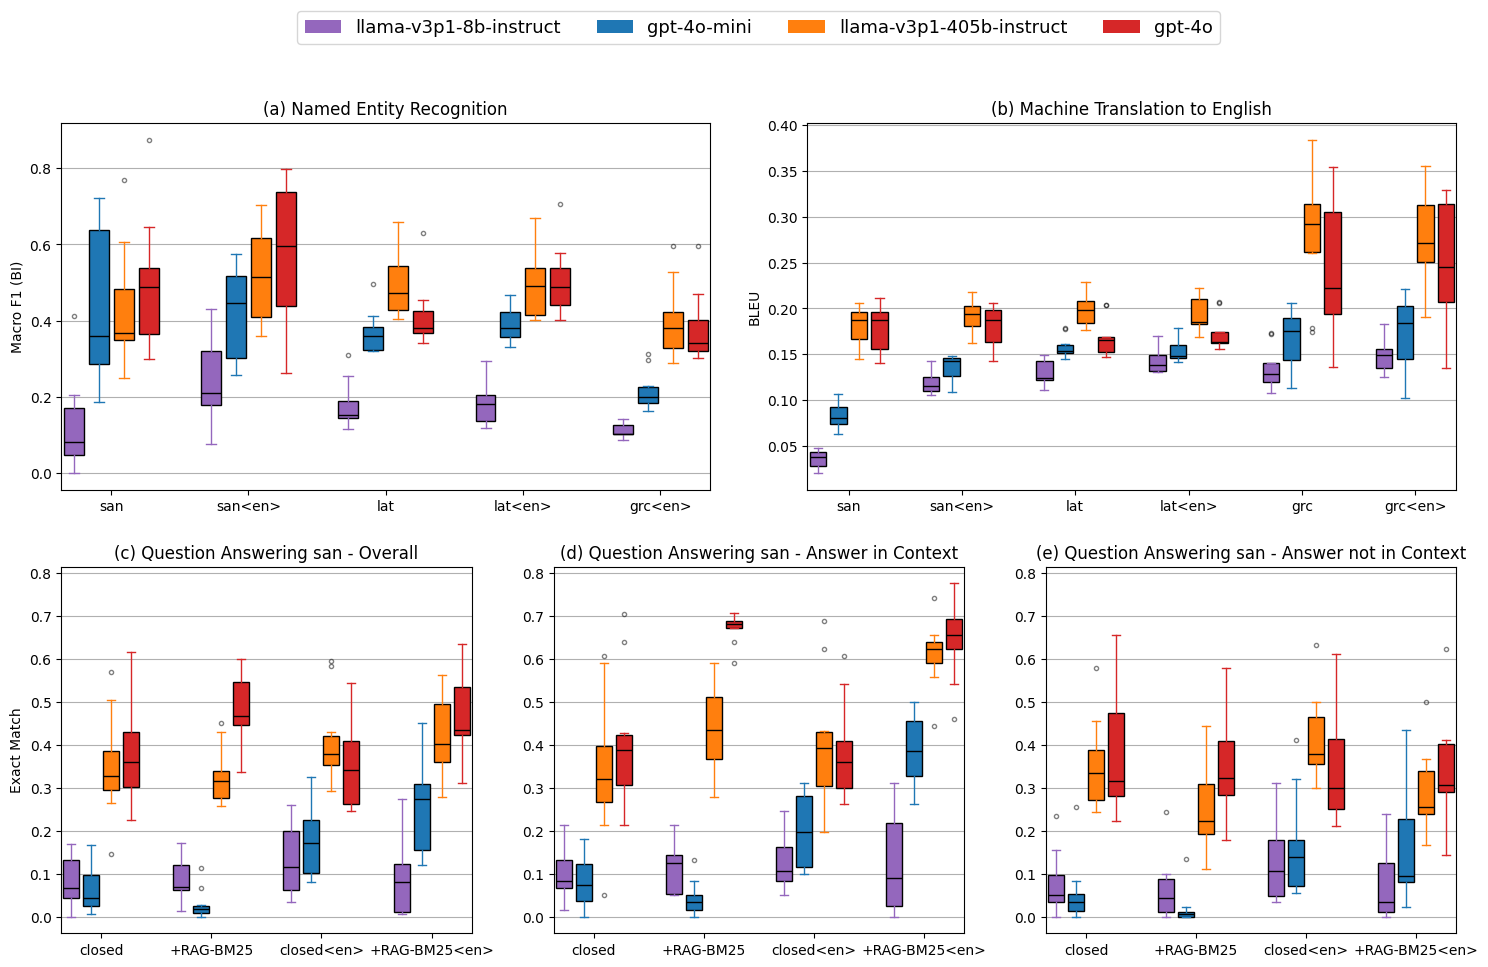

In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

# Load the results from a JSON file.
with open('results.json', 'r') as f:
    results = json.load(f)

# Get the list of tasks (e.g. "NER", "MT", etc.)
tasks = list(results.keys())

plt.rcParams.update({'font.size': 10})

# Define colors for each model (customize as needed)
model_colors = {
    "llama-v3p1-8b-instruct": "tab:purple",
    "gpt-4o-mini": "tab:blue",
    "llama-v3p1-405b-instruct": "tab:orange",
    "gpt-4o": "tab:red",
}
unique_models = list(model_colors.keys())
num_models = len(unique_models)

# We expect exactly 5 tasks (first 2 for top row, remaining 3 for bottom row)
if len(tasks) < 5:
    raise ValueError("Need at least 5 tasks for this layout.")

num_tasks = 5  # use the first five tasks
ylabels = ['Macro F1 (BI)', 'BLEU', 'Exact Match', '', '']

# Create a figure with 3 rows using GridSpec:
# Row 0: legend (thin row)
# Row 1: top tasks (2 plots)
# Row 2: bottom tasks (3 plots)
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[0.1, 1, 1], hspace=0.3)

# Top row: legend row spanning full width.
legend_ax = fig.add_subplot(gs[0])
legend_ax.axis('off')  # disable axis for legend

# Middle row: create a sub-GridSpec for 1 row and 2 columns.
gs_top = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1], wspace=0.15)
top_axes = [fig.add_subplot(gs_top[0, i]) for i in range(2)]

# Bottom row: create a sub-GridSpec for 1 row and 3 columns.
gs_bottom = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[2], wspace=0.2)
bottom_axes = [fig.add_subplot(gs_bottom[0, i]) for i in range(3)]

# Combine task axes in order: tasks 0 and 1 go to top_axes, tasks 2,3,4 go to bottom_axes.
task_axes = top_axes + bottom_axes

# To store y-range for bottom row tasks (for matching scale)
bottom_row_limits = []

gap = 1.5  # gap between language groups

# Loop over the first 5 tasks.
for i, task in enumerate(tasks[:num_tasks]):
    ax = task_axes[i]
    languages = list(results[task].keys())  # e.g. ['lat', 'san']
    
    # For labeling: record tick positions and labels (one per language group)
    tick_positions = []
    tick_labels = []
    
    # Compute local y-range for this task across all scores.
    task_scores = []
    for lang in languages:
        for model in unique_models:
            scores = results[task][lang].get(model, [])
            if scores:
                task_scores.extend(scores)
    if task_scores:
        local_y_min, local_y_max = min(task_scores), max(task_scores)
        margin = 0.05 * (local_y_max - local_y_min)
    else:
        local_y_min, local_y_max, margin = 0, 1, 0.05
    ax.set_ylim(local_y_min - margin, local_y_max + margin)
    
    # For bottom row tasks (i>=2) we collect limits to match y-scale later.
    if i >= 2:
        bottom_row_limits.append((local_y_min, local_y_max))
    
    # Plot box plots for each language and model.
    for j, lang in enumerate(languages):
        group_base = j * (num_models + gap)
        tick_positions.append(group_base + (num_models - 1) / 2.)
        tick_labels.append(lang)
        
        for k, model in enumerate(unique_models):
            pos = group_base + k
            scores = results[task][lang].get(model, [])
            if not scores:
                continue
            
            bp = ax.boxplot(scores,
                            positions=[pos],
                            widths=0.8,
                            patch_artist=True,
                            showfliers=True)
            for box in bp['boxes']:
                box.set_facecolor(model_colors[model])
            for median in bp['medians']:
                median.set_color("black")
            for whisker in bp['whiskers']:
                whisker.set_color(model_colors[model])
            for cap in bp['caps']:
                cap.set_color(model_colors[model])
            for flier in bp['fliers']:
                flier.set(marker='.', color=model_colors[model], alpha=0.5)
    
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)
    ax.set_title(task)
    ax.grid(axis='y')
    ax.set_ylabel(ylabels[i])

# Adjust y-limits for the bottom row so they match.
if bottom_row_limits:
    global_y_min = min(l[0] for l in bottom_row_limits)
    global_y_max = max(l[1] for l in bottom_row_limits)
    global_margin = 0.05 * (global_y_max - global_y_min)
    for ax in bottom_axes:
        ax.set_ylim(global_y_min - global_margin, global_y_max + global_margin)

# Create the legend in the reserved legend axis.
legend_handles = [Patch(facecolor=model_colors[model], label=model) for model in unique_models]
legend_ax.legend(handles=legend_handles, loc='center', ncol=len(unique_models), title="", prop={"size":13})


plt.tight_layout()
plt.savefig("results.png", dpi=300, bbox_inches="tight")
plt.show()


### Analyzing the NER confusion matrix

In [70]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [71]:
with open("results/ner/ner_confusion.json",'r') as fp:
    cm = json.load(fp)

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

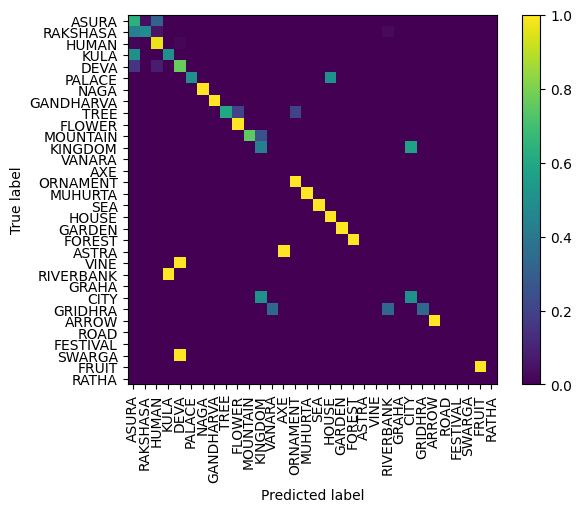

In [92]:
plt.rcParams.update({'font.size': 10})
disp = ConfusionMatrixDisplay(confusion_matrix=np.array(cm['skten_ner']['matrices']['gpt-4o-mini']), display_labels=cm['skten_ner']['labels'])
disp.plot(include_values=False, xticks_rotation='vertical')
plt.show()

/var/folders/tg/6p6yj87s2f51fnl8yf2ggdc00000gn/T/ipykernel_50910/3469758115.py:155: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


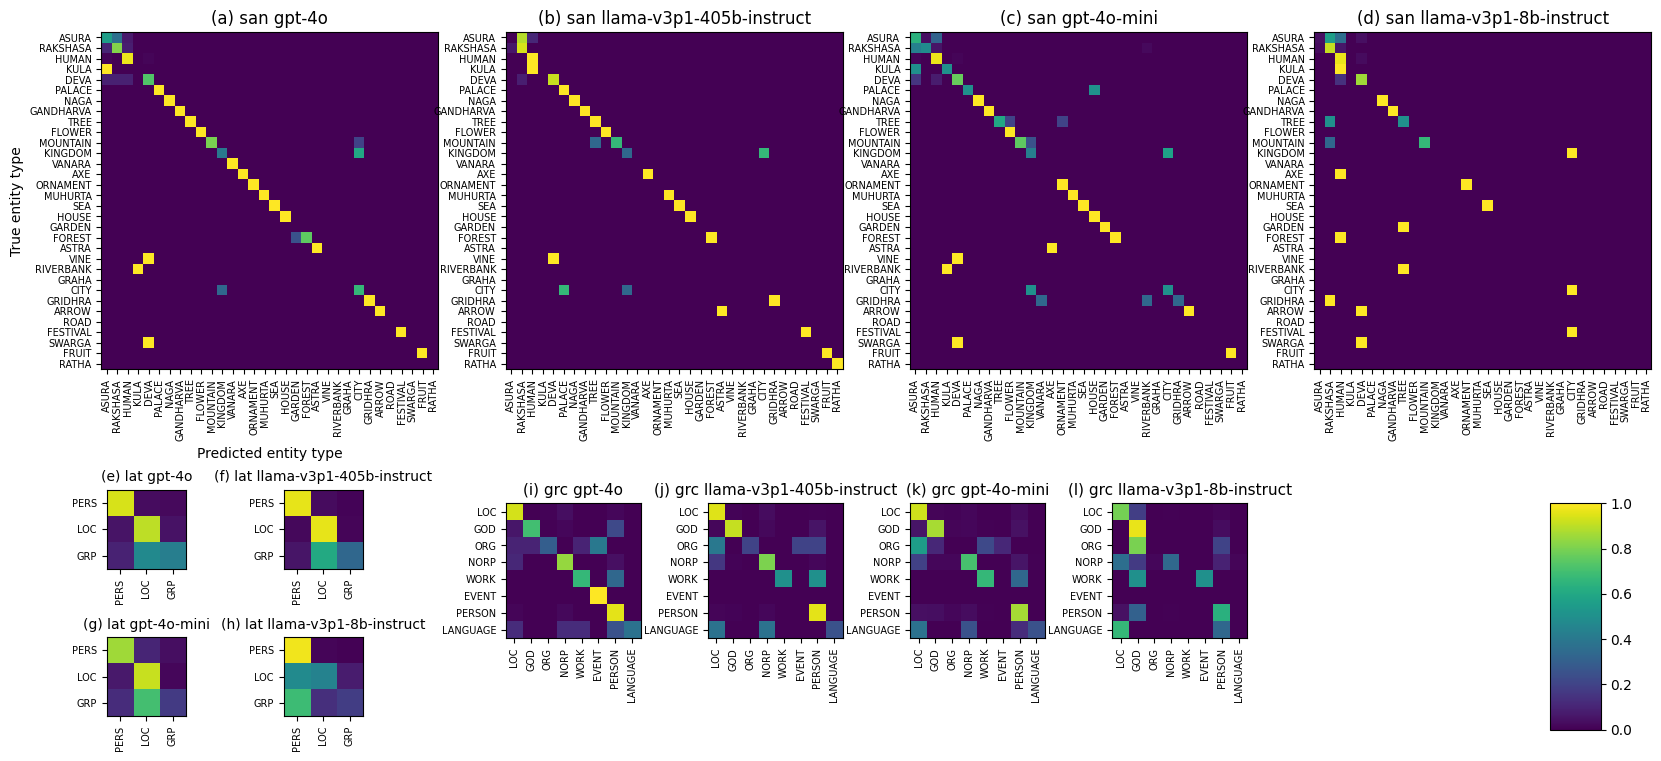

In [153]:

import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import matplotlib.colors as colors

# --- Load the data ---
with open("results/ner/ner_confusion.json", "r") as f:
    data = json.load(f)

# Mapping JSON keys to display codes:
# 'skten_ner' => 'san'
# 'lat_ner'   => 'lat'
# 'gra_ner'   => 'grc'
lang_map = {
    'skten_ner': 'san',
    'lat_ner': 'lat',
    'gra_ner': 'grc'
}

# Define models (with updated llama names)
models = [
    'gpt-4o',
    'llama-v3p1-405b-instruct',
    'gpt-4o-mini',
    'llama-v3p1-8b-instruct'
]

# --- Create the main figure ---
fig = plt.figure(constrained_layout=False, figsize=(20, 12))
gs_main = gridspec.GridSpec(nrows=2, ncols=4, 
                            width_ratios=[1, 1, 1, 1],
                            height_ratios=[2, 2],
                            figure=fig)
# Reduce the gap between the two main rows:
gs_main.update(hspace=0.04)

# =========================
# Top Row: San Plots (using key 'skten_ner')
# =========================
axes_san = []
title_count = 0
for i in range(4):
    ax = fig.add_subplot(gs_main[0, i])
    matrix = np.array(data['skten_ner']['matrices'][models[i]])
    im = ax.imshow(matrix, vmin=0, vmax=1, cmap='viridis')
    
    num_labels = len(data['skten_ner']['labels'])
    ax.set_xticks(np.arange(num_labels))
    ax.set_yticks(np.arange(num_labels))
    ax.set_xticklabels(data['skten_ner']['labels'], fontsize=7, rotation=90)
    ax.set_yticklabels(data['skten_ner']['labels'], fontsize=7)
    
    ax.set_title(f"({chr(ord('a')+title_count)}) {lang_map['skten_ner']} {models[i]}", fontsize=12)
    title_count += 1
    
    if i == 0:
        ax.set_xlabel("Predicted entity type", fontsize=10)
        ax.set_ylabel("True entity type", fontsize=10)
    else:
        ax.set_xlabel("")
        ax.set_ylabel("")
    
    ax.set_anchor('NE')
    axes_san.append(ax)

# =========================
# Bottom Row Panels
# =========================

# --- GRC Region (Columns 1-2) ---
gs_grc = gs_main[1, 1:3].subgridspec(nrows=1, ncols=4, wspace=0.5, hspace=0.5)
axes_grc = []

title_count = 0
for i in range(4):
    ax = fig.add_subplot(gs_grc[0, i])
    matrix = np.array(data['gra_ner']['matrices'][models[i]])
    ax.imshow(matrix, vmin=0, vmax=1, cmap='viridis')
    
    num_labels = len(data['gra_ner']['labels'])
    ax.set_xticks(np.arange(num_labels))
    ax.set_yticks(np.arange(num_labels))
    ax.set_xticklabels(data['gra_ner']['labels'], fontsize=7, rotation=90)
    ax.set_yticklabels(data['gra_ner']['labels'], fontsize=7)
    
    ax.set_title(f"({chr(ord('i')+title_count)}) {lang_map['gra_ner']} {models[i]}", fontsize=11)
    title_count += 1
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_anchor('NE')
    axes_grc.append(ax)

# --- LAT Region (Column 0) ---
lat_bbox = gs_main[1, 0].get_position(fig)  # [x0, y0, width, height]
# Use the top half of that cell
lat_rect = [
    lat_bbox.x0 - lat_bbox.height*0.1,
    lat_bbox.y0 + lat_bbox.height*0.53,  # start at half the cell height (top half)
    lat_bbox.width,
    lat_bbox.height/2               # half the cell height
]
# Define spacing factors relative to the cell dimensions:
lat_wspace = 0.05  # horizontal spacing (unchanged)
lat_hspace = 0.30  # increased vertical spacing to enlarge gap between the two rows

lat_subplot_width = (lat_rect[2] - lat_rect[2]*lat_wspace) / 2
lat_subplot_height = (lat_rect[3] - lat_rect[3]*lat_hspace) / 2

axes_lat = []
title_count = 0
for row in range(2):
    for col in range(2):
        left = lat_rect[0] + col * (lat_subplot_width + lat_rect[2]*lat_wspace)
        bottom = lat_rect[1] + lat_rect[3] - (row+1)*lat_subplot_height - row*(lat_rect[3]*lat_hspace)
        ax = fig.add_axes([left, bottom, lat_subplot_width, lat_subplot_height])
        index = row*2 + col
        matrix = np.array(data['lat_ner']['matrices'][models[index]])
        ax.imshow(matrix, vmin=0, vmax=1, cmap='viridis')
        
        num_labels = len(data['lat_ner']['labels'])
        ax.set_xticks(np.arange(num_labels))
        ax.set_yticks(np.arange(num_labels))
        ax.set_xticklabels(data['lat_ner']['labels'], fontsize=7, rotation=90)
        ax.set_yticklabels(data['lat_ner']['labels'], fontsize=7)
        
        ax.set_title(f"({chr(ord('e')+title_count)}) {lang_map['lat_ner']} {models[index]}", fontsize=10)
        title_count += 1
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_anchor('NE')
        axes_lat.append(ax)

# --- Colorbar Region (Column 3) ---
cb_bbox = gs_main[1, 3].get_position(fig)
# Use the top half of that cell:
cb_rect = [
    cb_bbox.x0,
    cb_bbox.y0 + cb_bbox.height/2,
    cb_bbox.width,
    cb_bbox.height/2
]
# Make the colorbar thin: use only 30% of the cell's width, aligned to the right.
new_width = cb_rect[2] * 0.15
new_x = cb_rect[0] + cb_rect[2] - new_width*2
cb_rect_adjusted = [new_x, cb_rect[1], new_width, cb_rect[3]]
ax_cb = fig.add_axes(cb_rect_adjusted)

# Create a ScalarMappable for the shared color scale.
sm = cm.ScalarMappable(cmap='viridis', norm=colors.Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, cax=ax_cb)

plt.tight_layout()
plt.savefig("results/ner/ner_cm.png", dpi=300, bbox_inches="tight")
plt.show()

### Lemmatizing answers

In [2]:
import pandas as pd
from SktQA.rag_qa import Retriever

In [7]:
from tqdm import tqdm
tqdm.pandas()

In [3]:
retriever = Retriever(file_path=None)

In [34]:
files = [f"results/rag/en_{pre}bm25_4.tsv" for pre in ['','ayurveda_']]

In [35]:
df_1, df_2 = pd.read_csv(files[0], sep='\t'), pd.read_csv(files[1], sep='\t')
df_ = pd.concat([df_1, df_2]).reset_index()
df_

,index,ID,QUESTION,ANSWER,CHOICES,context_0,context_1,context_2,context_3,gpt-4o,llama-v3p1-405b-instruct,gpt-4o-mini,llama-v3p1-8b-instruct
0,0,1,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामन...,नलनीलौ; नीलनलौ,NaN,सुखार्हस्य महार्हस्य सर्वभूतहितात्मनः ऐश्वर्ये...,ते वर्धयित्वा काकुत्स्थं रामेण प्रतिनन्दिताः अ...,रक्षसामीश्वरं मां च देवतानां भयंकरम् हीनं मां ...,तेषां सर्वं यथावृत्तमाख्याय रघुनन्दनः आत्मनश्च...,नलनीलौ,अंगदः हनुमान् च,"हनुमानः, सुग्रीवः",श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामन...
1,1,2,येन विमानेन श्रीरामः सीतालक्ष्मणाभ्यां सहितः ल...,पुष्पकम्; पुष्पकविमानम्,NaN,अब्रवीच्च विमानस्थः काकुत्स्थः सर्ववानरान् सुग...,एवमुक्तस्तु धर्मात्मा वानरैः सविभीषणैः अब्रवीद...,गच्छायोध्यामितो वीर विसर्जय च वानरान् मैथिलीं ...,निर्विशङ्का निरुद्विग्ना निरपेक्षा च मैथिली मा...,पुष्पकम्,पुष्पकम्,पुष्पकम्,येन विमानेन श्रीरामः सीतालक्ष्मणाभ्यां सहितः ल...
2,2,3,हनुमान् लक्ष्मणस्य मूर्च्छानिवारणाय लङ्कायाः य...,सुषेणः,NaN,किङ्किणीजालघोषाभिः पताकाभिरलंकृताम् आसाद्य सहस...,पद्भ्यां दृढमवस्थानं कृत्वा स कपिकुञ्जरः निकुञ...,धारयन्त्यसुरा यानि ददाम्येतानि सर्वशः वैद्याधर...,तानि दिव्यानि भद्रं ते ददाम्यस्त्राणि सर्वशः द...,सुषेणः,सुषेणः,वैद्याधरः,हनुमान् लक्ष्मणस्य मूर्च्छानिवारणाय लङ्कायाः य...
3,3,4,लक्ष्मणस्य मूर्च्छायाः दूरीकरणाय हनुमान् याम् ...,सञ्जीवनी,NaN,सीतातृतीयानारूढान्दृष्ट्वा धृष्टमचोदयत् सुमन्त...,सृष्टस्त्वं वनवासाय स्वनुरक्तः सुहृज्जने रामे ...,ततः सर्वार्थविद्वांसं रामं दशरथात्मजम् सुग्रीव...,सौम्य शीघ्रमितो गत्वा शैलमोषधिपर्वतम् पूर्वं ह...,विशल्यकरणी,विशल्यकरणी,विशल्यकरणी,सीतातृतीयानारूढान्दृष्ट्वा धृष्टमचोदयत् सुमन्त...
4,4,5,राज्ञः जनकस्य किं मूलं नाम आसीत् ?,सीरध्वजः,NaN,सज्जोऽहं त्वत्प्रतीक्षोऽस्मि वेद्यामस्यां प्रत...,जनकानां कुले कीर्तिमाहरिष्यति मे सुता सीता भर्...,रघोस्तु पुत्रस्तेजस्वी प्रवृद्धः पुरुषादकः कल्...,अथ राजा दशरथः प्रियातिथिमुपस्थिम दृष्ट्वा परमस...,मिथि,निमिः,मिथिलः,राज्ञः जनकस्य किं मूलं नाम आसीत् ?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,496,433,कवलं धारयितुं कल्कस्य का मात्रा गृह्णीयात्?,1 कर्ष,अर्ध कर्ष / 1 कर्ष / 2 कर्ष / 1 कोल,खर्परी तुत्थकं तुत्थादन्यत्तद्र सकं स्मृतम् ...,मण्ठकेन समो ज्ञेयः सम्पावोऽपि गुणैर्जनैः १२.११...,करवीरद्वयं तिक्तं कषायं कटुकञ्च तत् व्रणला...,अथ वटकः शुष्कः सरसश्च सूखा व रसदार बरा माष...,1 कर्ष,अर्ध कर्ष,1 कर्ष,अर्ध कर्ष
1497,497,439,वर्त्मगतरोगेषु कियत् वाक्-शतपर्यन्तं तर्पणं का...,100; १००; शतम्,100 / 500 / 600 / 700,दाहे रक्तं सितं छेदे निकषे कुङ्कुमप्रभम् त...,वृद्धिं करोति देहाग्नेर्लघु पाके विषापहम् ...,गोमूत्रं कटु तीक्ष्णोष्णं क्षारं तिक्तकषाय...,भल्लातकफलं पक्वं स्वादुपाकरसं लघु कषायं पा...,सप्तशतम्,शतपर्यन्तं,५००,600
1498,498,441,रसरूपं चूर्णरूपं वर्त्तिरूपं च एते कस्य भेदाः?,अञ्जन; अञ्जनस्य,पुटपाक / तर्पण / अञ्जन / सेक,स्थूलग्रन्थिः सुगन्धा स्यात्ततो हीनगुणा स्मृता...,खण्डन्तु सिकतारूपं सुश्वेतं शर्करा सिता सि...,उर्ध्वपातनयुक्त्या तु डमरुयंत्रपाचितम् हिङ...,इक्षो रसो यः सम्पक्वो घनः किञ्चिद्द्र वान्वितः...,अञ्जन,अञ्जन,पुटपाक,रसरूपं चूर्णरूपं वर्त्तिरूपं च एते कस्य भेदाः?
1499,499,443,भावप्रकाशे उक्ता रोगिणः परीक्षा केन आचार्येण उ...,वाग्भट्टः,चरकः / सुश्रुतः / वाग्भट्टः / माधवः,सेहुण्डो रेचनस्तीक्ष्णो दीपनः कटुको गुरुः ...,ध्मायमानस्य लोहस्य मलं मण्डूर मुच्यते लोहस...,तुषाम्बु दीपनं हृद्यं पाण्डुकृमिगदापहम् ती...,तैलं सर्जरसोद्भूतं विस्फोटव्रणनाशनम् कुष्ठ...,सुश्रुतः,माधवः,सुश्रुतः,वाग्भट्टः


In [36]:
df_['ANSWER_LEMMA'] = df_.progress_apply(lambda x: [retriever.lemmatize(y.strip()) for y in x['ANSWER'].split(';')], axis=1)

100%|████████████████████████████████████████████████████████████████████████████| 1501/1501 [03:02<00:00,  8.23it/s]


In [37]:
for m in ['gpt-4o', 'gpt-4o-mini', 'llama-v3p1-405b-instruct', 'llama-v3p1-8b-instruct']:
    df_[f"{m}_LEMMA"] = df_.progress_apply(lambda x: retriever.lemmatize(x[m]), axis=1)

100%|████████████████████████████████████████████████████████████████████████████| 1501/1501 [03:32<00:00,  7.06it/s]


In [38]:
import string
punct_table = str.maketrans(dict.fromkeys(string.punctuation))
def compare(ans_list,y):
    return str(y).replace('उत्तरम्','').translate(punct_table).strip() in [x.replace('।','').translate(punct_table).strip() for x in ans_list.split(';')]

In [48]:
import numpy as np
df_ = pd.read_csv('results/rag/lemmatized_answers.tsv', sep='\t')
df_.fillna('', inplace=True)
df_['ANSWER_LEMMA'] = df_.apply(lambda x: [y.strip().replace("'",'') for y in x['ANSWER_LEMMA'].replace('[','').replace(']','').split(',')],axis=1)
em_scores = {}
lm_scores = {}
crit_stats = {}
for m in ['gpt-4o', 'gpt-4o-mini', 'llama-v3p1-405b-instruct', 'llama-v3p1-8b-instruct']:
    em = df_.apply(lambda x: compare(x['ANSWER'],x[m]), axis=1)
    em_scores[m] = np.mean(em)

    lm = df_.apply(lambda x: set(x[f"{m}_LEMMA"].split()) in [set(y.split()) for y in x['ANSWER_LEMMA'] if y.strip() != ''], axis=1)
    lm_scores[m] = np.mean(lm)

    sw = df_.apply(lambda x: (len(x[f"{m}_LEMMA"].strip().split())>0), axis=1)
    crit = sw&(~em)&lm
    crit_stats[m] = {'score': np.sum(crit)/np.sum(sw), 'length': np.sum(sw)}

em_scores, lm_scores, crit_stats

({'gpt-4o': 0.46235842771485675,
  'gpt-4o-mini': 0.25316455696202533,
  'llama-v3p1-405b-instruct': 0.4183877415056629,
  'llama-v3p1-8b-instruct': 0.08860759493670886},
 {'gpt-4o': 0.4816788807461692,
  'gpt-4o-mini': 0.2804796802131912,
  'llama-v3p1-405b-instruct': 0.43770819453697535,
  'llama-v3p1-8b-instruct': 0.09793471019320453},
 {'gpt-4o': {'score': 0.05848787446504993, 'length': 1402},
  'gpt-4o-mini': {'score': 0.05135520684736091, 'length': 1402},
  'llama-v3p1-405b-instruct': {'score': 0.06963388370423547, 'length': 1393},
  'llama-v3p1-8b-instruct': {'score': 0.014354066985645933, 'length': 1463}})

In [46]:
df_

,index,ID,QUESTION,ANSWER,CHOICES,gpt-4o,llama-v3p1-405b-instruct,gpt-4o-mini,llama-v3p1-8b-instruct,ANSWER_LEMMA,gpt-4o_LEMMA,gpt-4o-mini_LEMMA,llama-v3p1-405b-instruct_LEMMA,llama-v3p1-8b-instruct_LEMMA
0,0,1,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामन...,नलनीलौ; नीलनलौ,,"नलः, नीलः",अंगदः नीलः च,"हनुमान, सुग्रीव",भल्लातक और नल,"['nalanīla', 'nīla nala']",nala nīla,hanumant sugrīva,aṃgada nīla,bhallātaka aura nala
1,1,2,येन विमानेन श्रीरामः सीतालक्ष्मणाभ्यां सहितः ल...,पुष्पकम्; पुष्पकविमानम्,,पुष्पकम्,पुष्पकविमानम्,Pushpak विमानम्,वानरविमाने,"['puṣpaka', 'puṣpaka vimāna']",puṣpaka,vimāna,puṣpaka vimāna,vānara vimāna
2,2,3,हनुमान् लक्ष्मणस्य मूर्च्छानिवारणाय लङ्कायाः य...,सुषेणः,,सुषेणः,सुषेणः,महाकश्यपः,सुग्रीव,['suṣeṇa'],suṣeṇa,mahākaśyapa,suṣeṇa,sugrīva
3,3,4,लक्ष्मणस्य मूर्च्छायाः दूरीकरणाय हनुमान् याम् ...,सञ्जीवनी,,सञ्जीवनी,संजीवनी,संजीवनी,संजीवनी वृक्षस्य फलम्,['saṃjīvanī'],saṃjīvanī,saṃjīvanī,saṃjīvanī,saṃjīvanī vṛkṣa phala
4,4,5,राज्ञः जनकस्य किं मूलं नाम आसीत् ?,सीरध्वजः,,मिथिला,विदेहः,मिथिला,जनकः,['sīradhvaja'],mithilā,mithilā,videha,janaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,496,433,कवलं धारयितुं कल्कस्य का मात्रा गृह्णीयात्?,1 कर्ष,अर्ध कर्ष / 1 कर्ष / 2 कर्ष / 1 कोल,1 कर्ष,अर्ध कर्ष,2 कर्ष,अर्ध कर्ष,['kṛṣ'],kṛṣ,kṛṣ,ardha karṣa,ardha karṣa
1497,497,439,वर्त्मगतरोगेषु कियत् वाक्-शतपर्यन्तं तर्पणं का...,100; १००; शतम्,100 / 500 / 600 / 700,५००,षट्शतपर्यन्तं तर्पणं कार्यम्,पञ्चशतं,100,"['', '', '']",,,ṣaṣ paryanta tarpaṇa,
1498,498,441,रसरूपं चूर्णरूपं वर्त्तिरूपं च एते कस्य भेदाः?,अञ्जन; अञ्जनस्य,पुटपाक / तर्पण / अञ्जन / सेक,अञ्जन,अञ्जनस्य,पुटपाकस्य भेदाः,"पुटपाकस्य रसरूपं, तर्पणस्य चूर्णरूपं, अञ्जनस्य...","['añjana', 'añjana']",añjana,puṭapāka bheda,añjana,puṭapāka rasa rūpa tarpaṇa cūrṇa rūpa añjana v...
1499,499,443,भावप्रकाशे उक्ता रोगिणः परीक्षा केन आचार्येण उ...,वाग्भट्टः,चरकः / सुश्रुतः / वाग्भट्टः / माधवः,सुश्रुतः,चरकः,चरकः,वाग्भट्टः,['vāgbhaṭṭa'],suśruta,caraka,caraka,vāgbhaṭṭa


In [40]:
#df_.to_csv('results/rag/lemmatized_answers.tsv',sep='\t',index=False)